<a href="https://colab.research.google.com/github/HemantGhugeTarsyer/Face_Classifier_Quant/blob/main/Face_Classifier_Quant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np
import cv2

In [2]:
tf.__version__

'2.3.0'

In [3]:
local_zip = '/tmp/Face-mask-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
!ls /tmp/Face-mask-data/

Test-data  Train-data


In [5]:
SOURCE_DIR = '/tmp/Face-mask-data/'
TESTING_DIR = '/tmp/Face-mask-data/Test-data/'
TRAINING_DIR = '/tmp/Face-mask-data/Train-data/'

In [6]:
print(len(os.listdir(TRAINING_DIR)))
print(len(os.listdir(TESTING_DIR)))

2288
260


In [7]:
train_images = np.zeros((2288, 86, 86, 3), dtype=np.float32)
train_labels = np.zeros((2288,), dtype=np.float32)
test_images = np.zeros((260, 86, 86, 3), dtype=np.float32)
test_labels = np.zeros((260,), dtype=np.float32)

In [8]:
print(train_images.shape)
print(test_images.shape)

(2288, 86, 86, 3)
(260, 86, 86, 3)


In [9]:
for idx, filename in enumerate(os.listdir(TRAINING_DIR)):
    file_path = TRAINING_DIR + filename
    img = cv2.imread(file_path)
    img = cv2.resize(img, (86, 86))
    train_images[idx] = img
    
    if filename[0] == 'f':
        train_labels[idx] = 0
    elif filename[0] == 'm':
        train_labels[idx] = 1
    else:
        print("ERROR: Check file name")

In [10]:
print(train_labels)

[1. 0. 1. ... 0. 1. 0.]


In [11]:
for idx, filename in enumerate(os.listdir(TESTING_DIR)):
    file_path = TESTING_DIR + filename
    img = cv2.imread(file_path)
    img = cv2.resize(img, (86, 86))
    test_images[idx] = img
    
    if filename[0] == 'f':
        test_labels[idx] = 0
    elif filename[0] == 'm':
        test_labels[idx] = 1
    else:
        print("ERROR: Check file name")

In [12]:
print(test_labels)

[0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.]


0.0


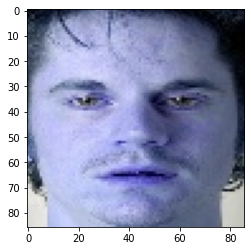

In [13]:
import matplotlib.pylab as plt

plt.imshow(test_images[2].astype(np.uint8))
print(test_labels[2])

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(86, 86, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 84, 84, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0

In [16]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
                              steps_per_epoch=len(train_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(test_images, test_labels, batch_size=32),
                              validation_steps=len(test_images) / 32)

model.evaluate(test_images, test_labels)

Epoch 1/15
72/71 [==============================] - 17s 232ms/step - loss: 0.3829 - accuracy: 0.8086 - val_loss: 0.2802 - val_accuracy: 0.9192
Epoch 2/15
72/71 [==============================] - 17s 230ms/step - loss: 0.1761 - accuracy: 0.9414 - val_loss: 0.1001 - val_accuracy: 0.9769
Epoch 3/15
72/71 [==============================] - 17s 230ms/step - loss: 0.1494 - accuracy: 0.9458 - val_loss: 0.0727 - val_accuracy: 0.9731
Epoch 4/15
72/71 [==============================] - 16s 229ms/step - loss: 0.1344 - accuracy: 0.9559 - val_loss: 0.0864 - val_accuracy: 0.9731
Epoch 5/15
72/71 [==============================] - 16s 229ms/step - loss: 0.1327 - accuracy: 0.9532 - val_loss: 0.0985 - val_accuracy: 0.9731
Epoch 6/15
72/71 [==============================] - 17s 230ms/step - loss: 0.1055 - accuracy: 0.9650 - val_loss: 0.0590 - val_accuracy: 0.9846
Epoch 7/15
72/71 [==============================] - 17s 229ms/step - loss: 0.1024 - accuracy: 0.9668 - val_loss: 0.0711 - val_accuracy: 0.9808

[6.5151047706604, 0.9692307710647583]

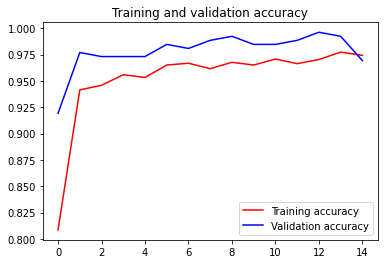

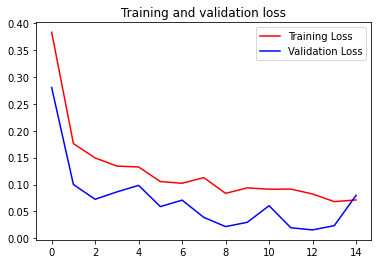

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [18]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_images).batch(1).take(100):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp341jzs72/assets


In [19]:
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [20]:
import pathlib

tflite_models_dir = pathlib.Path("/tmp/tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [21]:
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_model_quant)

354960

In [24]:
!du -sh /tmp/tflite_models/model_quant.tflite

348K	/tmp/tflite_models/model_quant.tflite


In [25]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, test_image_indices):
  global test_images

  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    test_image = test_images[test_image_index]
    test_label = test_labels[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    predictions[i] = output.argmax()

  return predictions


In [31]:
import matplotlib.pylab as plt

# Change this to test a different image
test_image_index = 10

## Helper function to test the models on one image
def test_model(tflite_file, test_image_index, model_type):
  global test_labels

  predictions = run_tflite_model(tflite_file, [test_image_index])

  plt.imshow(test_images[test_image_index].astype(np.uint8))
  template = model_type + " Model \n True:{true}, Predicted:{predict}"
  _ = plt.title(template.format(true= str(test_labels[test_image_index]), predict=str(predictions[0])))
  plt.grid(False)

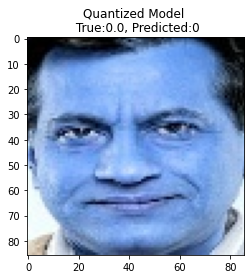

In [32]:
test_model(tflite_model_quant_file, test_image_index, model_type="Quantized")